<a href="https://colab.research.google.com/github/Ruhul786/Stock-Price-Prediction/blob/main/Reliance_Power_Price_Prediction_SARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT: 
# Assisting Foreign Institutional Investor (FII) with Investement in R power shares who purchased shares worth 10,00,000 lakh on 31st May, 2021


#Overview

1) I will train model in different ways for better prediction

2) We have taken Reliance Power Price from Yahoo Finance. 

3) The price is daily.

4) Got API from
- https://blog.quantinsti.com/historical-market-data-python-api/

# **Reliance Power Shares (RPOWER.NS)**
Reliance Power Limited is a part of the Reliance Group, one of India’s largest business houses. The group operates across multiple sectors,including telecommunications, financial services, media and entertainment, infrastructure and energy. The energy sector companies include Reliance Infrastructure and Reliance Power. https://www.reliancepower.co.in/web/reliance-power/company-overview

***Note : *** 
- In this notebook we will check efficiency on Daily data 
for SARIMAX Algo which performed better previously.
- The price is from NSE - NSE Real Time Price. Currency in INR.
https://finance.yahoo.com/quote/RPOWER.NS/history?p=RPOWER.NS

#**1) Import Dataset**

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [3]:
## Got below API from
## https://blog.quantinsti.com/historical-market-data-python-api/

In [4]:
# Install yfinance and matplotlib package
!pip install yfinance
!pip install matplotlib
# Import yfinance and matplotlib
import yfinance as yf  
import matplotlib.pyplot as plt
# Get the data for the Reliance Power by specifying the stock ticker, start date, and end date
# We will use ticker GLD for SPDR Gold Shares.
data = yf.download('RPOWER.NS','2015-01-01','2021-11-03')

[*********************100%***********************]  1 of 1 completed


In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10 

## This makes the figure's width 10 inches, and its height 10 inches. 
## https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib

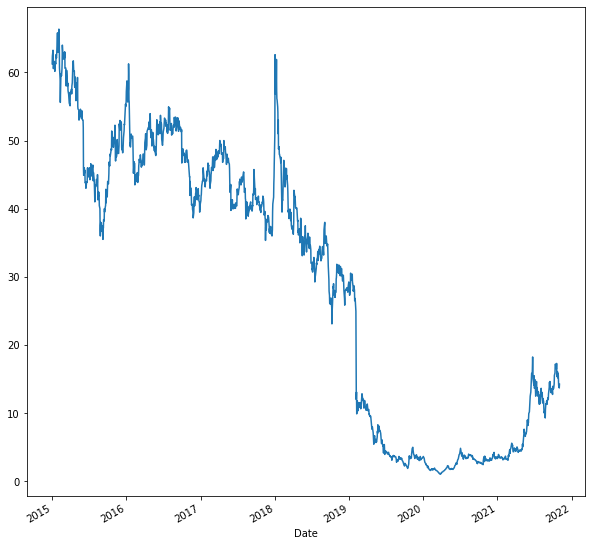

In [6]:
# Plot the open prices
data["Open"].plot()
plt.show()

In [7]:
df = pd.DataFrame(data) ## Converting Dataframe 

In [8]:
df.shape

(1687, 6)

* Date – Daily , Currency – INR
* Data collected from Jan 01 2015 to Sep 13 2021
* Total years data = 5 years 7 months

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1687 entries, 2015-01-01 to 2021-11-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1687 non-null   float64
 1   High       1687 non-null   float64
 2   Low        1687 non-null   float64
 3   Close      1687 non-null   float64
 4   Adj Close  1687 non-null   float64
 5   Volume     1687 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 92.3 KB


In [10]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,61.250000,63.200001,61.250000,62.400002,61.130421,2982093
2015-01-02,62.400002,63.849998,62.400002,63.250000,61.963123,4056781
2015-01-05,63.250000,63.950001,62.799999,63.400002,62.110073,3624746
2015-01-06,62.849998,62.900002,60.599998,60.950001,59.709919,4925484
2015-01-07,60.549999,61.299999,59.400002,60.500000,59.269073,4533177
2015-01-08,61.000000,61.750000,60.599998,61.500000,60.248730,3408923
2015-01-09,61.650002,62.200001,60.299999,60.950001,59.709919,3501703
2015-01-12,61.000000,61.450001,60.500000,61.250000,60.003815,2574207
2015-01-13,61.250000,61.500000,59.950001,60.150002,58.926197,4112746


In [11]:
df.tail(10)  

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-20,15.75,15.90,15.35,15.35,15.35,16567771
2021-10-21,15.35,16.10,15.00,15.85,15.85,13581770
2021-10-22,16.10,16.35,15.15,15.30,15.30,10470209
2021-10-25,16.00,16.00,14.65,14.90,14.90,16425421
2021-10-26,15.15,15.60,15.05,15.60,15.60,15385081
2021-10-27,15.75,16.10,15.35,15.55,15.55,17537172
2021-10-28,14.80,14.80,14.80,14.80,14.80,4953478
2021-10-29,14.10,14.60,14.10,14.10,14.10,29306333
2021-11-01,13.70,14.20,13.40,14.00,14.00,55664798


In [12]:
pd.options.display.max_rows  ## Maximum rows displayed

60

In [14]:
pd.options.display.max_columns  ## Maximum rows displayed

20

In [15]:
pd.set_option('display.max_rows', None) ## To show more rows

In [16]:
df.head(100)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,61.250000,63.200001,61.250000,62.400002,61.130421,2982093
2015-01-02,62.400002,63.849998,62.400002,63.250000,61.963123,4056781
2015-01-05,63.250000,63.950001,62.799999,63.400002,62.110073,3624746
2015-01-06,62.849998,62.900002,60.599998,60.950001,59.709919,4925484
2015-01-07,60.549999,61.299999,59.400002,60.500000,59.269073,4533177
2015-01-08,61.000000,61.750000,60.599998,61.500000,60.248730,3408923
2015-01-09,61.650002,62.200001,60.299999,60.950001,59.709919,3501703
2015-01-12,61.000000,61.450001,60.500000,61.250000,60.003815,2574207
2015-01-13,61.250000,61.500000,59.950001,60.150002,58.926197,4112746


#**2) Check Null Values**

In [17]:
df.isnull().sum() ## No null values

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [18]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

# EDA Conclusion
- there are missing data, e.g. stock prices are missing on non-trading days like weekends and holidays
- we are going to resample the dates and use forward fill to fill the missing values in the dataframe

In [20]:
ffill_data = df.resample("D").ffill().reset_index()


In [21]:
print("RPOWER Data After Forward Fill: " + str(ffill_data.shape))
ffill_data.head(10)

RPOWER Data After Forward Fill: (2498, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,61.250000,63.200001,61.250000,62.400002,61.130421,2982093
1,2015-01-02,62.400002,63.849998,62.400002,63.250000,61.963123,4056781
2,2015-01-03,62.400002,63.849998,62.400002,63.250000,61.963123,4056781
3,2015-01-04,62.400002,63.849998,62.400002,63.250000,61.963123,4056781
4,2015-01-05,63.250000,63.950001,62.799999,63.400002,62.110073,3624746
5,2015-01-06,62.849998,62.900002,60.599998,60.950001,59.709919,4925484
6,2015-01-07,60.549999,61.299999,59.400002,60.500000,59.269073,4533177
7,2015-01-08,61.000000,61.750000,60.599998,61.500000,60.248730,3408923
8,2015-01-09,61.650002,62.200001,60.299999,60.950001,59.709919,3501703
9,2015-01-10,61.650002,62.200001,60.299999,60.950001,59.709919,3501703


In [22]:
ffill_data.tail(10) ## We have sucessfully filled

,Date,Open,High,Low,Close,Adj Close,Volume
2488,2021-10-24,16.10,16.35,15.15,15.30,15.30,10470209
2489,2021-10-25,16.00,16.00,14.65,14.90,14.90,16425421
2490,2021-10-26,15.15,15.60,15.05,15.60,15.60,15385081
2491,2021-10-27,15.75,16.10,15.35,15.55,15.55,17537172
2492,2021-10-28,14.80,14.80,14.80,14.80,14.80,4953478
2493,2021-10-29,14.10,14.60,14.10,14.10,14.10,29306333
2494,2021-10-30,14.10,14.60,14.10,14.10,14.10,29306333
2495,2021-10-31,14.10,14.60,14.10,14.10,14.10,29306333
2496,2021-11-01,13.70,14.20,13.40,14.00,14.00,55664798
2497,2021-11-02,14.25,14.70,13.90,14.70,14.70,17792708


In [23]:
ffill_data.shape

(2498, 7)

In [24]:
ffill_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [25]:
ffill_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [26]:
ffill_data.head(100)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,61.250000,63.200001,61.250000,62.400002,61.130421,2982093
1,2015-01-02,62.400002,63.849998,62.400002,63.250000,61.963123,4056781
2,2015-01-03,62.400002,63.849998,62.400002,63.250000,61.963123,4056781
3,2015-01-04,62.400002,63.849998,62.400002,63.250000,61.963123,4056781
4,2015-01-05,63.250000,63.950001,62.799999,63.400002,62.110073,3624746
5,2015-01-06,62.849998,62.900002,60.599998,60.950001,59.709919,4925484
6,2015-01-07,60.549999,61.299999,59.400002,60.500000,59.269073,4533177
7,2015-01-08,61.000000,61.750000,60.599998,61.500000,60.248730,3408923
8,2015-01-09,61.650002,62.200001,60.299999,60.950001,59.709919,3501703
9,2015-01-10,61.650002,62.200001,60.299999,60.950001,59.709919,3501703


In [28]:
ffill_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

- We have successfully resampled the dates 
- and used forward fill to fill the missing values in the dataframe
- We will only consider Dates and Open Price for our analysis.

In [29]:
df1 = ffill_data[['Date', 'Open']].copy()

In [30]:
df1.head(10)

,Date,Open
0,2015-01-01,61.250000
1,2015-01-02,62.400002
2,2015-01-03,62.400002
3,2015-01-04,62.400002
4,2015-01-05,63.250000
5,2015-01-06,62.849998
6,2015-01-07,60.549999
7,2015-01-08,61.000000
8,2015-01-09,61.650002
9,2015-01-10,61.650002


In [31]:
df1.tail(10)

,Date,Open
2488,2021-10-24,16.10
2489,2021-10-25,16.00
2490,2021-10-26,15.15
2491,2021-10-27,15.75
2492,2021-10-28,14.80
2493,2021-10-29,14.10
2494,2021-10-30,14.10
2495,2021-10-31,14.10
2496,2021-11-01,13.70
2497,2021-11-02,14.25


- We have collected data from Janaury 01, 2015 to Sep 13, 2021

#**3) Converting data types**

In [32]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [33]:
## df['Price'] = pd.to_numeric(df['Price'])  ## Gives error when we use this directly
## df['Total Est. Engagement Revenue'] = df['Total Est. Engagement Revenue'] .replace(',','', regex=True)
## Replacing comma ',' in object for conversion of object to int

In [34]:
## df1['Price'] = df['Price'].replace(',','',regex=True) ## Not required

In [35]:
df1['Open'] = pd.to_numeric(df1['Open'])

#**4) Visualizing Null Values**





In [36]:
df1.isnull().sum()  ## No null Values

Date    0
Open    0
dtype: int64

#**5) Treating / Replacing Null Values**
##* Already covered under Step 2

#**6) Analyzing Trend**

In [41]:
px.line(df1,x='Date', y='Open')

In [42]:
## The trend is increasing and looks like there may be seasonality.

In [43]:
df1.shape

(2498, 2)

In [44]:
##df['Date'].plot()

In [45]:
df1['Open'].head(2)

0    61.250000
1    62.400002
Name: Open, dtype: float64

In [46]:
type(df1['Open'])

pandas.core.series.Series

In [48]:
df1.head(2)

,Date,Open
0,2015-01-01,61.250000
1,2015-01-02,62.400002


# **Checking Seasonality**
- We are checking if data is seasonal or not.
- The below plots tells that trend is increasing and there is seasonality.

In [50]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10 

## This makes the figure's width 10 inches, and its height 10 inches. 
## https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib

In [91]:
# Use seasonal_decompose to check for seasonal time series
# Additive = Level + Trend + Seasonality + Noise
# Used freq = 12 to represent 12 months in a year. For days 365 can be used. 

# Had to run this line of code because encountered this error - TypeError: float() argument must be a string or a number, not Period
# This is the solution - Re-registering Pandas converters with"
pd.plotting.register_matplotlib_converters()

from statsmodels.tsa.seasonal import seasonal_decompose
pd.plotting.register_matplotlib_converters()

decomp_results = seasonal_decompose(df['Open'],  model='additive', freq=365)

# Visualize the data using time-series decomposition
decomp_results.plot()
plt.show()


TypeError: ignored

-	The frequency parameter of statsmodels’ seasonal_decompose() method has been deprecated and replaced with the 'period' parameter. Please use period inplace of frequency.

- https://github.com/statsmodels/statsmodels/issues/3503

- https://towardsdatascience.com/time-series-decomposition-and-statsmodels-parameters-69e54d035453

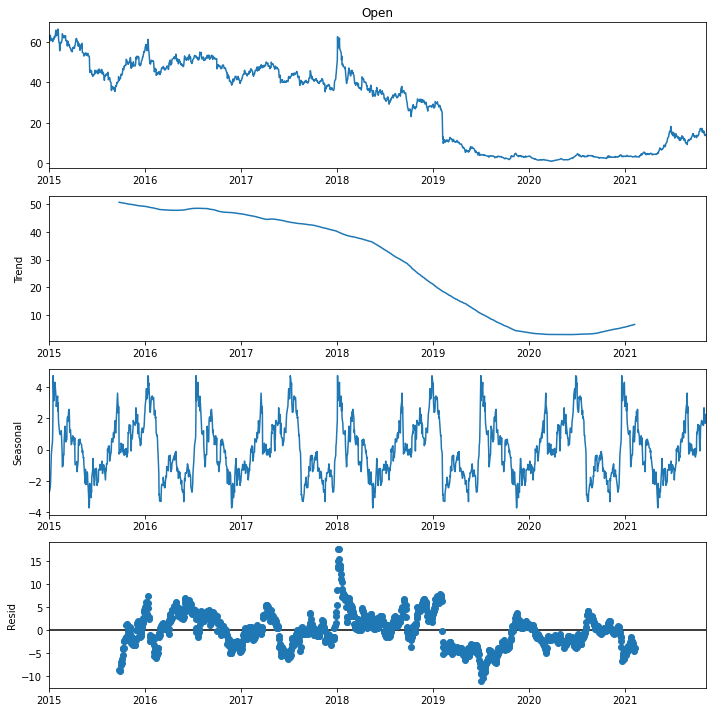

In [90]:
# Use seasonal_decompose to check for seasonal time series
# Additive = Level + Trend + Seasonality + Noise
# Used freq = 12 to represent 12 months in a year. For days 365 can be used. 

# Had to run this line of code because encountered this error - TypeError: float() argument must be a string or a number, not Period
# This is the solution - Re-registering Pandas converters with"
pd.plotting.register_matplotlib_converters()

from statsmodels.tsa.seasonal import seasonal_decompose
pd.plotting.register_matplotlib_converters()

decomp_results = seasonal_decompose(df['Open'],  model='additive', period=365)

# Visualize the data using time-series decomposition
decomp_results.plot()
plt.show()


**Previous codes below
- THe above plots are showing dates using plot() which comes under matplotlib
- We are creating new dataframe "df2" by storing all values of "df" in it.
- Also we will set index as date for df2 
https://stackoverflow.com/questions/47355526/pandas-series-not-plotting-to-timeseries-chart

In [53]:
df2 = df1.iloc[:]  ## or df.iloc[:.:] 

In [54]:
df2.shape

(2498, 2)

In [55]:
df2.set_index('Date', inplace=True)

In [56]:
df2.head(2)

,Open
Date,
2015-01-01,61.250000
2015-01-02,62.400002


In [57]:
df2['Open'].head(2)

Date
2015-01-01    61.250000
2015-01-02    62.400002
Name: Open, dtype: float64

In [58]:
import statsmodels
print(statsmodels.__version__)

0.13.2


- I have used different parameters of period below - 7, 200 etc but 365 above is the correct for our daily data.

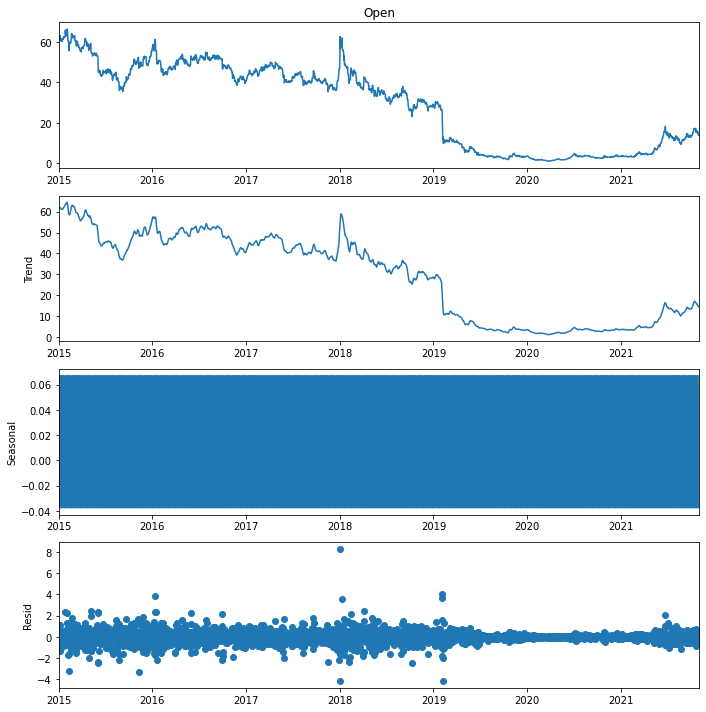

In [94]:
# Use seasonal_decompose to check for seasonal time series
# Additive = Level + Trend + Seasonality + Noise
# Used freq = 12 to represent 12 months in a year. For days 365 can be used. 

# Had to run this line of code because encountered this error - TypeError: float() argument must be a string or a number, not Period
# This is the solution - Re-registering Pandas converters with"
pd.plotting.register_matplotlib_converters()

from statsmodels.tsa.seasonal import seasonal_decompose
pd.plotting.register_matplotlib_converters()

decomp_results = seasonal_decompose(df2['Open'],  model='additive', period=7)

# Visualize the data using time-series decomposition
decomp_results.plot()
plt.show()

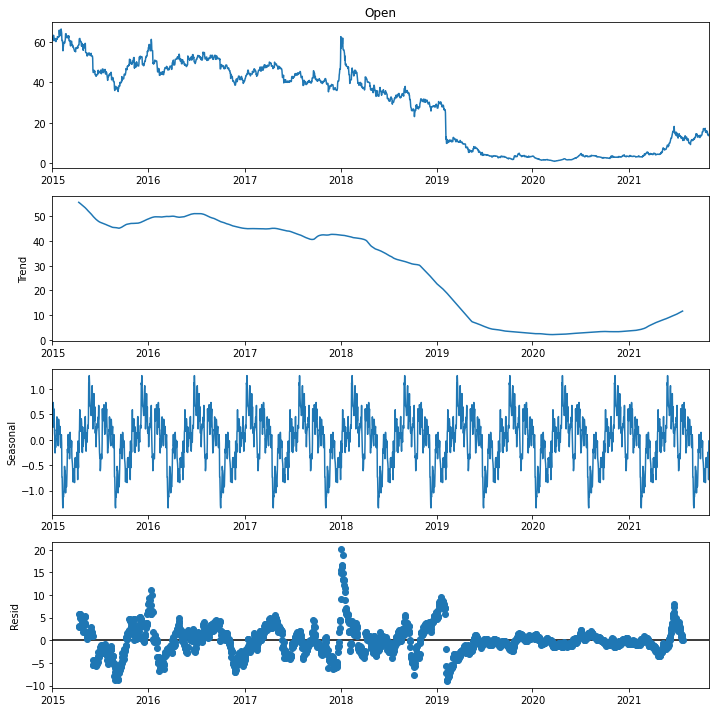

In [95]:
# Use seasonal_decompose to check for seasonal time series
# Additive = Level + Trend + Seasonality + Noise
# Used freq = 12 to represent 12 months in a year. For days 365 can be used. 

# Had to run this line of code because encountered this error - TypeError: float() argument must be a string or a number, not Period
# This is the solution - Re-registering Pandas converters with"
pd.plotting.register_matplotlib_converters()

from statsmodels.tsa.seasonal import seasonal_decompose
pd.plotting.register_matplotlib_converters()

decomp_results = seasonal_decompose(df2['Open'],  model='additive', period=200)

# Visualize the data using time-series decomposition
decomp_results.plot()
plt.show()

- We can clearly see the seasonal pattern on above plot 
- Decreasing Trend

#**7) Building Model using SARIMAX**

In [67]:
df1.shape

(2498, 2)

In [68]:
df1.set_index('Date', inplace=True) ## Setting Index to date. Imperative to set index as date while building model using Time Series
df1.head(2)

,Open
Date,
2015-01-01,61.250000
2015-01-02,62.400002


**# Current Train and Test Split**
- We will not train test split. 
- We will use historical price till current date 13th Sep, 2021
- for better prediction

**# Previously while checking model accuracy**
- We have Train and Test split such that test set contains last 14 days / 2 week daily price.
- We have followed this technique since we realized that SARIMAX performs 
- better when we update our model daily.
- Also we came through various articles suggesting it might struggle
- for 25 -30 steps prediction.
- https://stackoverflow.com/questions/63148156/arima-model-not-accurate-prediction
- https://stats.stackexchange.com/questions/461292/arima-stock-price-prediction-is-very-bad

# **Auto Arima for best parameters**

- In Python, the pmdarima package provides auto_arima() function which can be used to automate the process of ARIMA Forecasting in Python.

- auto_arima() uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.

In [96]:
pip install pmdarima ## We have to restart runtime after insatlling pmdarima first time and start again from Step 1

In [69]:
from pmdarima.arima import auto_arima

In [70]:
# Reference - http://www.alkaline-ml.com/pmdarima/0.9.0/modules/generated/pyramid.arima.auto_arima.html
# m = number of observations per seasonal cycle, 7-daily, 12-monthly, 52-weekly
# Seasonal = True by default
# Stationary = False by default

results = auto_arima(df1[['Open']],
                    seasonal=True,
                    start_p = 1,
                    start_q = 1,
                    #max_p = 3,
                    #max_q = 3,
                    start_P=1,
                    start_Q=1,
                    max_P=3,
                    max_Q=3,
                    m=7, #seasonal period
                    information_criterion='aic',
                    trace=True,
                    error_action='ignore',
                    stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=6015.383, Time=2.92 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=6016.391, Time=0.19 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=6015.183, Time=0.78 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=6014.630, Time=0.95 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=6015.751, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=6018.374, Time=0.34 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=6013.383, Time=2.26 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=6015.183, Time=0.72 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=5999.228, Time=5.10 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=6010.751, Time=1.55 sec
 ARIMA(0,1,1)(3,0,1)[7] intercept   : AIC=6001.188, Time=8.82 sec
 ARIMA(0,1,1)(2,0,2)[7] intercept   : AIC=6000.693, Time=12.77 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=5999.417, Time=7.25 sec
 ARIMA(0,1,1)(3,0,0)[7] intercept   : AIC=6010.165, Time=2.85 sec
 ARIMA(0,1,1)(3,0,2)[7] intercep

# **Best Model per Auto Arima :** 
- ARIMA(0,1,0)(2,0,1)[7] 
- Let's check these parameters for building model

In [72]:
import statsmodels.api as sm

In [73]:
## Here we have used extra parameters seasonal_order mentioning lag of 12 months.
model1 = sm.tsa.statespace.SARIMAX(df1['Open'], order = (0, 1, 0), seasonal_order =(2,0,1,7))  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [74]:
results1 = model1.fit()

In [75]:
Actual_Price = df1['Open'].tail(14)   ## it is a series not dataframe

In [76]:
Forecasted_Price = results1.predict(start = 2484, end =2497, dynamic =False)  ## Using dynamic =False
# Forecasted_Price = results1.predict(start = 2421, end =2434, dynamic =False)  ## Using dynamic =False
# Forecasted_Price = results1.predict(start = 2386, end =2399, dynamic =False)  ## Using dynamic =False

In [77]:
df1.shape

(2498, 1)

In [78]:
Actual_Price

Date
2021-10-20    15.75
2021-10-21    15.35
2021-10-22    16.10
2021-10-23    16.10
2021-10-24    16.10
2021-10-25    16.00
2021-10-26    15.15
2021-10-27    15.75
2021-10-28    14.80
2021-10-29    14.10
2021-10-30    14.10
2021-10-31    14.10
2021-11-01    13.70
2021-11-02    14.25
Name: Open, dtype: float64

In [79]:
Forecasted_Price

2021-10-20    17.347485
2021-10-21    15.623820
2021-10-22    15.292008
2021-10-23    16.100000
2021-10-24    16.100000
2021-10-25    16.058072
2021-10-26    15.950012
2021-10-27    15.112878
2021-10-28    15.641716
2021-10-29    14.785781
2021-10-30    14.100000
2021-10-31    14.100000
2021-11-01    14.116398
2021-11-02    13.552193
Freq: D, Name: predicted_mean, dtype: float64

# Accuracy Check

In [98]:
 ## r2 is not a good approach
from sklearn.metrics import r2_score 
r2_score(Actual_Price,Forecasted_Price)  
### Per r2 score - Model Not good , we have predicted something less.Then we need to go for some other time series data.
## r2 score should be bteween between 0 and 1.
## https://blog.exploratory.io/a-gentle-introduction-to-backtesting-for-evaluating-the-prophet-forecasting-models-66c132adc37c
## https://www.kaggle.com/prashant111/arima-model-for-time-series-forecasting

0.4121218322611765

In [99]:
## We will follow other metrics
def forecast_accuracy(forecast, actual):
  rmse = np.mean((forecast - actual)**2)**.5
  mae = np.mean(np.abs(forecast - actual))
  mape = np.mean(np.abs(forecast - actual)/np.abs(actual))
  return({'mape':mape, 'mae': mae, 'rmse':rmse})



In [83]:
forecast_accuracy(Forecasted_Price, Actual_Price)

{'mae': 0.486871856335139,
 'mape': 0.032229450073694585,
 'rmse': 0.6637666889348517}

**We will consider MAPE for checking accuracy** 
https://blog.exploratory.io/a-gentle-introduction-to-backtesting-for-evaluating-the-prophet-forecasting-models-66c132adc37c

**Around 3.22 % MAPE implies the model is  performing very good for the next 14 observations.**

**Verdict - SARIMAX  Model has 96.78% Accuracy**

**Also dynamic = True and dynamic = False , giving same prediction**

# Price Prediction for next 14 days after 1st Sep

In [84]:
df1.shape

(2498, 1)

In [85]:
#Pred_Price4 = results1.get_prediction(start = 2399, end =2412, dynamic = False) 
#Pred_Price4 = results1.get_prediction(start = 2435, end =2448, dynamic = False) 
Pred_Price4 = results1.get_prediction(start = 2498, end =2511, dynamic = False) 

In [86]:
Pred_Price4_mean = Pred_Price4.predicted_mean

In [87]:
Pred_Price4_mean

2021-11-03    14.385415
2021-11-04    14.294967
2021-11-05    14.186459
2021-11-06    14.186458
2021-11-07    14.186458
2021-11-08    14.191488
2021-11-09    14.173846
2021-11-10    14.233253
2021-11-11    14.242977
2021-11-12    14.215093
2021-11-13    14.215093
2021-11-14    14.215093
2021-11-15    14.255283
2021-11-16    14.191041
Freq: D, Name: predicted_mean, dtype: float64